### Classifification Methodology

We make use of K Means Algorithm to form clusters of our input image and then accordingly apply some logic to find the optimum value of K

Refrence Logic: https://www.youtube.com/watch?v=IEBsrUQ4eMc

Handling Imports

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from mat4py import loadmat
from sklearn.cluster import KMeans

Loading ground truth data

In [6]:
data = loadmat('gt_sample_image.mat')
# print("Raw Source Data:")
# print(data)

pts = []
for loc in data['image_info']['location']:
    pts.append((int(loc[0]), int(loc[1])))

total_count = data['image_info']['number']
print("Total Count:")
print(total_count)
print("Points:")
print(pts)

Total Count:
61
Points:
[(746, 473), (650, 491), (917, 364), (976, 331), (949, 87), (974, 184), (1003, 148), (942, 287), (864, 218), (793, 230), (832, 169), (720, 130), (675, 254), (635, 260), (578, 275), (586, 194), (440, 233), (430, 201), (440, 155), (458, 103), (296, 297), (275, 257), (590, 109), (619, 107), (573, 63), (993, 43), (861, 29), (872, 17), (893, 24), (916, 36), (929, 31), (951, 39), (972, 50), (843, 22), (252, 229), (252, 205), (243, 182), (250, 166), (250, 141), (218, 132), (249, 118), (207, 78), (179, 86), (161, 91), (152, 82), (125, 70), (254, 24), (290, 17), (410, 97), (367, 16), (388, 22), (431, 11), (480, 33), (509, 33), (502, 8), (65, 70), (13, 52), (196, 2), (126, 5), (525, 5), (571, 6)]


Visualizing data

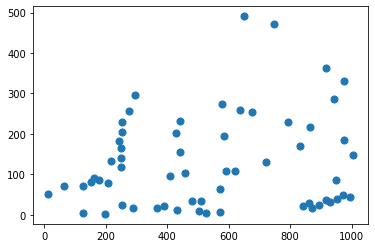

In [8]:
X = np.array(pts)
plt.scatter(X[:, 0], X[:,1 ], s=50)

Implementing Elbow method

In [13]:
dist_points_from_cluster_center = []
K = range(1, 10)
for no_of_clusters in K:
    k_model = KMeans(no_of_clusters)
    k_model.fit(X)
    dist_points_from_cluster_center.append(k_model.inertia_)
    

In [14]:
display(dist_points_from_cluster_center)

[6046744.655737705,
 1988186.9270152505,
 1195456.4761904762,
 816725.6489898991,
 655400.044642857,
 529099.7576867577,
 397796.01154401153,
 338892.582972583,
 281171.913961039]

Visualizing distances in graph

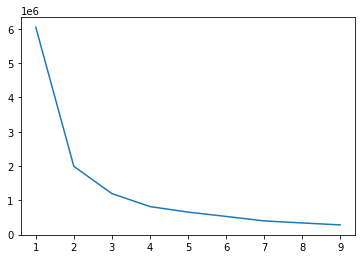

In [15]:
plt.plot(K, dist_points_from_cluster_center)

Adding a reference line from start to end

This reference line would be used to calculate point distance between our refrence plot, and accordingly find an optimal value of K

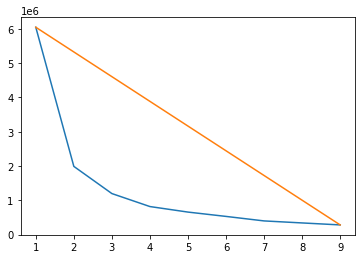

In [22]:
plt.plot(K, dist_points_from_cluster_center)
plt.plot([K[0], K[-1]], [dist_points_from_cluster_center[0], dist_points_from_cluster_center[-1]])

Finding range of distance between 2 lines

TODO: Add reference articles for the logic behind calc_distance

In [24]:
def calc_distance(x, y, a, b, c):
    d = abs((a * x + b * y + c)) / (math.sqrt(a * a + b * b))
    return d

In [25]:
a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[-1]
b = K[-1] - K[0]
c1 = K[0] * dist_points_from_cluster_center[-1]
c2 = K[-1] * dist_points_from_cluster_center[0]
c = c1 - c2

In [26]:
dist_points_from_line = []
for k in range(K[-1]):
    dist_points_from_line.append(calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))

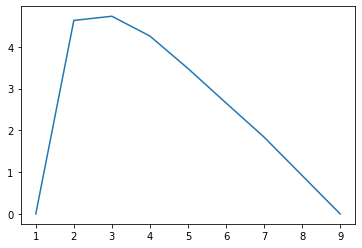

In [27]:
plt.plot(K, dist_points_from_line)

In [28]:
print("Optimum value of K: " + str(dist_points_from_line.index(max(dist_points_from_line)) + 1))

Optimum value of K: 3
